## Problem Definition and Goal Setting

**Goal to achieve**: Predict PD progression (MDS-UPDRS) using motor data.

**Smart Goals**:
- **Specific**: Develop an ML model to predict the progression of PD (MDS-UPDRS) using unimodal motor data. 
- **Measurable**: Evaluate the model's performance using appropriate regression metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²). 
- **Achievable**: Use PPMI data.

**Determine type of ML problem**: *Regression*; the task is to predict the continuous progression of motor symptoms over time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/larsheijnen/Thesis/data/MDS-UPDRS_Part_III_21Mar2025.csv')

In [3]:
motor_features = [
    'PATNO', 'EVENT_ID', 'INFODT',  # Identifying information
    
    # MDS-UPDRS Part III scores
    'NP3SPCH', 'NP3FACXP', 
    'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL',  # Rigidity
    'NP3FTAPR', 'NP3FTAPL',  # Finger tapping
    'NP3HMOVR', 'NP3HMOVL',  # Hand movements
    'NP3PRSPR', 'NP3PRSPL',  # Pronation-supination
    'NP3TTAPR', 'NP3TTAPL',  # Toe tapping
    'NP3LGAGR', 'NP3LGAGL',  # Leg agility
    'NP3RISNG',  # Arising from chair
    'NP3GAIT', 'NP3FRZGT',  # Gait and freezing
    'NP3PSTBL',  # Postural stability
    'NP3POSTR',  # Posture
    'NP3BRADY',  # Body bradykinesia
    'NP3PTRMR', 'NP3PTRML',  # Postural tremor
    'NP3KTRMR', 'NP3KTRML',  # Kinetic tremor
    'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON',  # Rest tremor
    'NP3TOT'  # Total score
]

# Create the DataFrame with selected features (only keep columns that exist in the data)
motor_df = data[[col for col in motor_features if col in data.columns]]

# Display the first few rows to verify the contents
print(f"Motor assessment DataFrame shape: {motor_df.shape}")
motor_df.head()

Motor assessment DataFrame shape: (32346, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


In [ ]:
missing_percentage = motor_df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

for column, percentage in missing_percentage_sorted.items():
    print(f"{column}: {percentage:.2f}% missing")

plt.figure(figsize=(14, 6))
missing_percentage_sorted.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation**: NP3TOT is missing the most. To remove rows with NaN values.

In [4]:
motor_df = motor_df.dropna(subset=['NP3TOT'])

print(f"Updated DataFrame shape: {motor_df.shape}")
motor_df.head()

Updated DataFrame shape: (26109, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


PATNO: 0.00% missing
NP3LGAGL: 0.00% missing
NP3GAIT: 0.00% missing
NP3FRZGT: 0.00% missing
NP3PSTBL: 0.00% missing
NP3POSTR: 0.00% missing
NP3BRADY: 0.00% missing
NP3PTRMR: 0.00% missing
NP3PTRML: 0.00% missing
NP3KTRMR: 0.00% missing
NP3KTRML: 0.00% missing
NP3RTARU: 0.00% missing
NP3RTALU: 0.00% missing
NP3RTARL: 0.00% missing
NP3RTALL: 0.00% missing
NP3RTALJ: 0.00% missing
NP3RTCON: 0.00% missing
NP3RISNG: 0.00% missing
NP3LGAGR: 0.00% missing
EVENT_ID: 0.00% missing
NP3TTAPL: 0.00% missing
INFODT: 0.00% missing
NP3SPCH: 0.00% missing
NP3FACXP: 0.00% missing
NP3RIGN: 0.00% missing
NP3RIGRU: 0.00% missing
NP3RIGLU: 0.00% missing
NP3RIGRL: 0.00% missing
NP3RIGLL: 0.00% missing
NP3FTAPR: 0.00% missing
NP3FTAPL: 0.00% missing
NP3HMOVR: 0.00% missing
NP3HMOVL: 0.00% missing
NP3PRSPR: 0.00% missing
NP3PRSPL: 0.00% missing
NP3TTAPR: 0.00% missing
NP3TOT: 0.00% missing


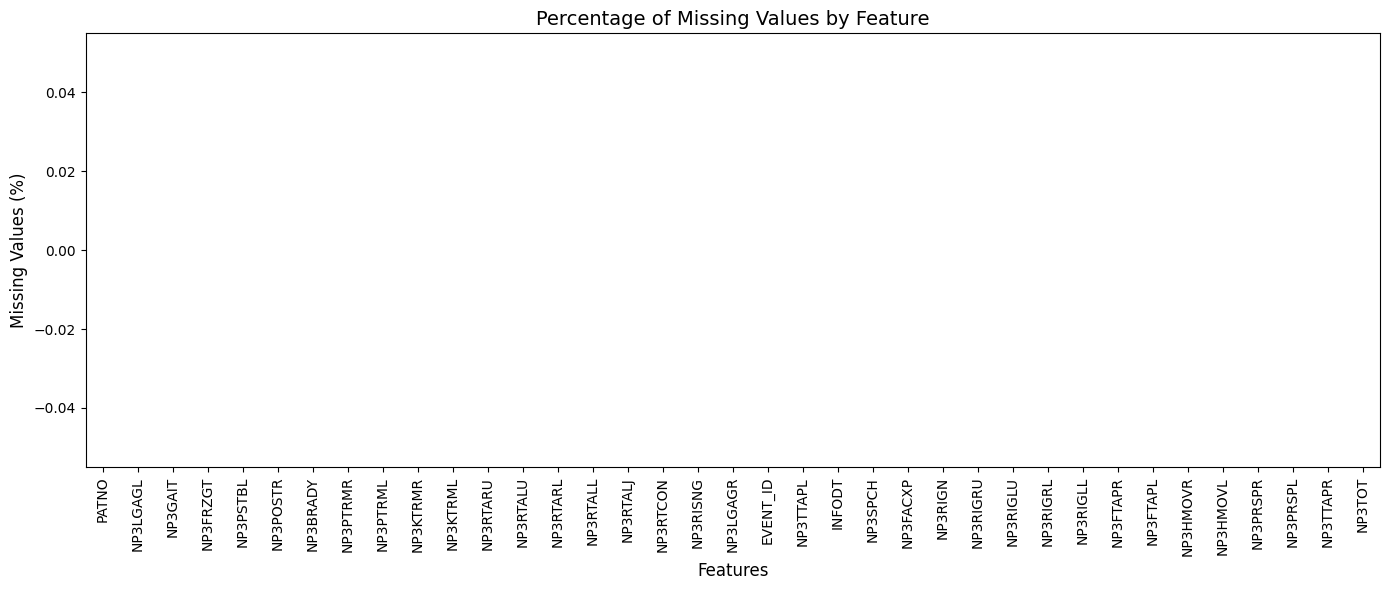

In [6]:
missing_percentage = motor_df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

for column, percentage in missing_percentage_sorted.items():
    print(f"{column}: {percentage:.2f}% missing")

plt.figure(figsize=(14, 6))
missing_percentage_sorted.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation**: After removing rows with NaN in NP3TOT, no other features have missing values left!

In [7]:
# Define a function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the function to the 'NP3TOT' column
motor_df_no_outliers = remove_outliers_iqr(motor_df, column)

print(f"Original DataFrame shape: {motor_df.shape}")
print(f"DataFrame shape after removing outliers: {motor_df_no_outliers.shape}")
motor_df_no_outliers.head()

Original DataFrame shape: (26109, 37)
DataFrame shape after removing outliers: (25891, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


**Interpretation**: Removing outliers removed 218 rows. 

In [10]:
from sklearn.preprocessing import StandardScaler

motor_df_standardized = motor_df_no_outliers.copy()

# Identify columns to scale: we exclude identifiers and date fields
columns_to_scale = [col for col in motor_df_no_outliers.columns if col not in ['PATNO', 'EVENT_ID', 'INFODT']]

scaler = StandardScaler()
motor_df_standardized[columns_to_scale] = scaler.fit_transform(motor_df_standardized[columns_to_scale])

motor_df_standardized.head()

,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.540018,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-0.891230
1,3000,V04,03/2012,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.540018,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-1.106147
2,3000,V06,02/2013,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.540018,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-0.891230
3,3000,V08,03/2014,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.540018,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-1.034508
4,3000,V10,03/2015,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,1.335199,1.410365,1.202759,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,0.183358


In [ ]:
from scipy import stats
import seaborn as sns

# Calculate skewness for each numeric feature
skewness = motor_df_standardized.select_dtypes(include=['float64', 'int64']).apply(lambda x: stats.skew(x))
skewness_sorted = skewness.sort_values(ascending=False)

# Display top skewed features
print("Top 10 skewed features:")
print(skewness_sorted.head(10))
print("\nLeast skewed features:")
print(skewness_sorted.tail(10))

# Create a figure to visualize distributions
plt.figure(figsize=(15, 10))

# Plot histogram of NP3TOT (target variable)
plt.subplot(2, 2, 1)
sns.histplot(motor_df_standardized['NP3TOT'], kde=True)
plt.title(f"Distribution of NP3TOT (Skewness: {skewness['NP3TOT']:.3f})")
plt.xlabel('NP3TOT Score')

# Q-Q plot for NP3TOT
plt.subplot(2, 2, 2)
stats.probplot(motor_df_standardized['NP3TOT'], plot=plt)
plt.title("Q-Q Plot of NP3TOT")

# Boxplot for NP3TOT
plt.subplot(2, 2, 3)
sns.boxplot(x=motor_df_standardized['NP3TOT'])
plt.title("Boxplot of NP3TOT")

# Plot distribution of a highly skewed feature
most_skewed_feature = skewness_sorted.index[0]
plt.subplot(2, 2, 4)
sns.histplot(motor_df_standardized[most_skewed_feature], kde=True)
plt.title(f"Distribution of {most_skewed_feature} (Skewness: {skewness[most_skewed_feature]:.3f})")

plt.tight_layout()
plt.show()

In [11]:
motor_df_standardized['INFODT'] = pd.to_datetime(motor_df_standardized['INFODT'])
motor_df_standardized = motor_df_standardized.sort_values(['PATNO', 'INFODT'])
motor_df_standardized['days_since_baseline'] = motor_df_standardized.groupby('PATNO')['INFODT'] \
    .transform(lambda x: (x - x.min()).dt.days)

motor_df_standardized.head()

/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_3019/3003532433.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  motor_df_standardized['INFODT'] = pd.to_datetime(motor_df_standardized['INFODT'])


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,days_since_baseline
0,3000,BL,2011-02-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-0.891230,0
1,3000,V04,2012-03-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-1.106147,394
2,3000,V06,2013-02-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-0.891230,731
3,3000,V08,2014-03-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-1.034508,1124
4,3000,V10,2015-03-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,1.410365,1.202759,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,0.183358,1489


In [ ]:
X = motor_df_standardized.drop(['NP3TOT', 'PATNO', 'EVENT_ID', 'INFODT'], axis=1)
y = motor_df_standardized['NP3TOT']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking

input_features = [col for col in motor_df_standardized.columns if col not in ['NP3TOT', 'PATNO', 'EVENT_ID', 'INFODT']]

# Create sequences using a sliding window approach:
# For each patient, for each visit (after the first) use all previous visits as input and current NP3TOT as target.
sequences = []
targets = []

for patient, group in motor_df_standardized.groupby('PATNO'):
    group = group.sort_values('days_since_baseline')
    X_data = group[input_features].values
    y_data = group['NP3TOT'].values
    # Only create samples if patient has at least 2 visits
    if len(group) >= 2:
        for i in range(1, len(group)):
            sequences.append(X_data[:i])
            targets.append(y_data[i])

print(f"Number of sequences: {len(sequences)}")

# Pad sequences to have equal length
# (Pre-padding is used so that recent visits are at the end of the sequence)
padded_sequences = pad_sequences(sequences, padding='pre', dtype='float32')
print(f"Padded sequences shape: {padded_sequences.shape}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, np.array(targets), test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf

# Check if TensorFlow is using the Metal backend
print("Is TensorFlow using GPU?", tf.config.list_physical_devices('GPU'))

timesteps = padded_sequences.shape[1]
num_features = padded_sequences.shape[2]

model = Sequential([
    # Mask padded values (which are 0) so they are not considered in the LSTM computations
    Masking(mask_value=0., input_shape=(timesteps, num_features)),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, verbose=1)

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual NP3TOT")
plt.ylabel("Predicted NP3TOT")
plt.title("Actual vs Predicted NP3TOT")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()